In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

import pandas as pd
import matplotlib.pyplot as plt

In [41]:
original = pd.read_csv(
    f'datasets_1358_30676_Players.csv')
original.set_index(['Index'], inplace = True)
original = original[original['born'].notna()]
original['born'] = original['born'].astype('int')
original

,Player,height,weight,collage,born,birth_city,birth_state
Index,,,,,,,
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996,Hendersonville,Tennessee


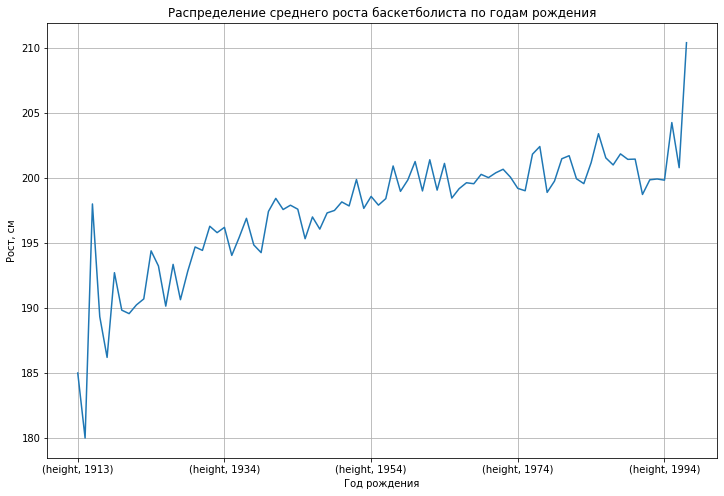

In [45]:
average_height = original.groupby('born').mean()
height = average_height[['height']]
height.unstack().plot()
plt.xlabel('Год рождения')
plt.ylabel('Рост, см')
plt.title('Распределение среднего роста баскетболиста по годам рождения')
plt.grid()

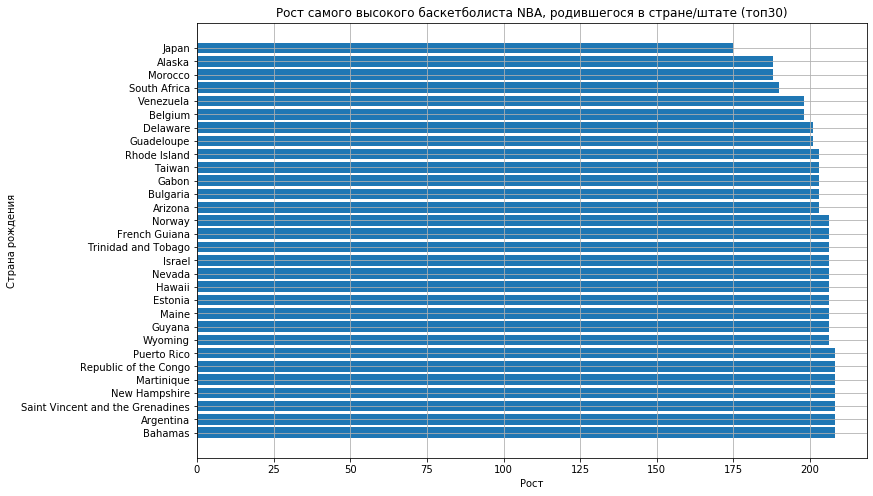

In [112]:
amount = original.groupby('birth_state')[['height']].max()
corrected = amount.sort_values('height', ascending = False).tail(30)
corrected['height'] = corrected['height'].astype('int')
corrected
plt.barh(corrected.index, corrected['height'])
plt.xlabel('Рост')
plt.ylabel('Страна рождения')
plt.title('Рост самого высокого баскетболиста NBA, родившегося в стране/штате (топ30)')
plt.grid()